<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction (Data Cleaning)


## Loading Data



Name : Rahaf Hosari

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
import pandas as pd
import numpy as np
import missingno as msno #Required in G.3

# Save the filepath and load the data as "df_titanic"
url = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Data/sales_predictions_2023.csv"
df = pd.read_csv(url)

Summary of Data

In [3]:
#Summary of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Read First 5 rows

In [4]:
#Read the Data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [5]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?

In [6]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


3) Are there duplicates? If so, drop any duplicates.

In [7]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

Since the annswer from the above sell is 0, meaning there's no duplicated rows.

4) Identify missing values.

In [8]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


5) Address the missing values by using a placeholder value.

In [9]:
#Missing Values of Item_Weight replace with -1
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight']

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [10]:
#Missing Values of Outlet Size replace with -1
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,MISSING
4,High
...,...
8518,High
8519,MISSING
8520,Small
8521,Medium


In [11]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


6) Confirm that there are no missing values after addressing them.

In [12]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
categorial_cols = df.select_dtypes('object').columns
categorial_cols
# loop through the list of string columns
for column in categorial_cols:
  # print the value counts for the column
  count =  df[column].value_counts()
  print(f"Value counts for {column} : {count}")
  print()

Value counts for Item_Identifier : Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Value counts for Item_Fat_Content : Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Value counts for Item_Type : Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Value counts for Outlet_Identifier : Outlet_Identifier
OUT027    935
O

In [15]:
#No Inconsistency in Object type columns

In [16]:
categorial_cols = df.select_dtypes('float').columns
categorial_cols
# loop through the list of string columns
for column in categorial_cols:
  # print the value counts for the column
  count =  df[column].value_counts()
  print(f"Value counts for {column} : {count}")
  print()

Value counts for Item_Weight : Item_Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: count, Length: 416, dtype: int64

Value counts for Item_Visibility : Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

Value counts for Item_MRP : Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64

Value counts for Item_Outlet_Sales : Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: coun

In [17]:
categorial_cols = df.select_dtypes('int').columns
categorial_cols
# loop through the list of string columns
for column in categorial_cols:
  # print the value counts for the column
  count =  df[column].value_counts()
  print(f"Value counts for {column} : {count}")
  # Print an empty line for readability
  print()

Value counts for Outlet_Establishment_Year : Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64



8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [18]:
numerical_cols = df.select_dtypes('number').columns
numerical_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
df[numerical_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Sales Prediction (Data Visualization)

Imports

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histograms

### Item Weight Histogram

Text(0.5, 0, 'Weight (kg)')

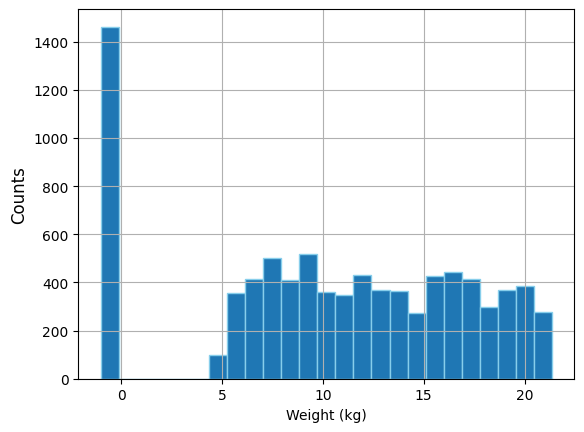

In [28]:
# Item_Weight Histogram
ax = df['Item_Weight'].hist(bins='auto', edgecolor='skyblue')
ax.set_ylabel('Counts', fontsize = 12)
ax.set_xlabel("Weight (kg)")



```
The histogram shows the distribution of item weights in the dataset.  
The x-axis represents the weight of the items assuming in kilograms, and the y-axis represents the number of items with that weight.
As it can be seen the shape of the distribution indicates a concentration of item weights within a certain range.
The presence of -1 (data below zero) indicates the placeholder values used for missing data, which was replaced above in the Data Cleaning Section.
```



### Outlet Establishment Year Histogram

Text(0.5, 0, 'Establishment Year')

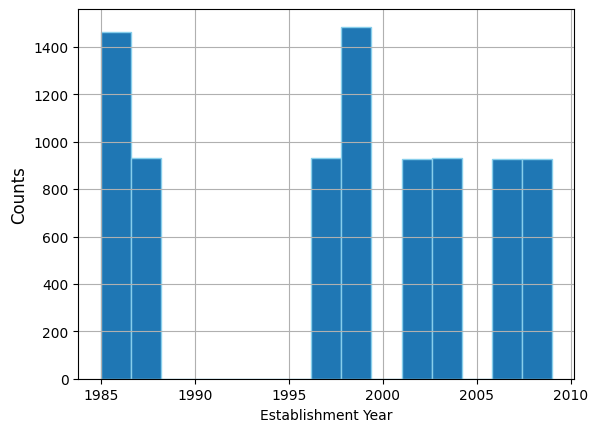

In [25]:
#Outlet_Establishment_Year Histogram
ax = df['Outlet_Establishment_Year'].hist(bins='auto', edgecolor='skyblue')
ax.set_ylabel('Counts', fontsize = 12)
ax.set_xlabel("Establishment Year")



```
The histogram displays the distribution of outlet establishment years.
The x-axis represents the year of establishment for each outlet, and the y-axis shows the count of outlets established in that year.
We can see which years had a higher number of outlets established.
The distribution can reveal trends in outlet openings over different years.
```



### Item Outlet Sales Histogram

Text(0.5, 0, 'Sales')

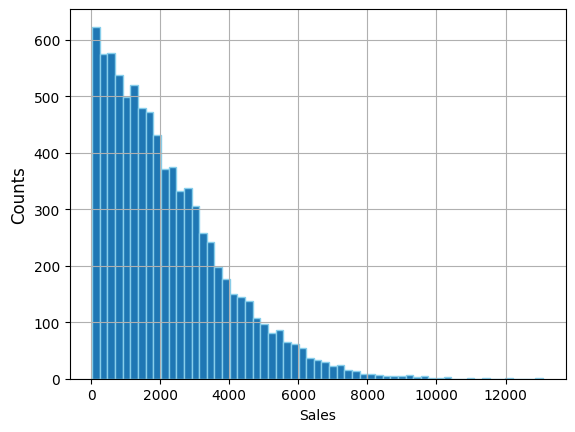

In [31]:

ax = df['Item_Outlet_Sales'].hist(bins='auto', edgecolor='skyblue')
ax.set_ylabel('Counts', fontsize = 12)
ax.set_xlabel("Sales")



```
The graph shows distribution of sales figures.
The x-axis represents the sales amount, and the y-axis denotes the frequency of sales within a particular range.
# It helps understand the typical sales values, the range of sales, and potential outliers (very high or low sales).  
The histogram shows a skewed distribution.
```



## Boxplots

In [46]:
# ax = df.boxplot()
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Item Weight and Item Type

<ipython-input-50-76b5a81fbeed>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0.5, 1.0, 'Item Weight Distribution by Item Type')

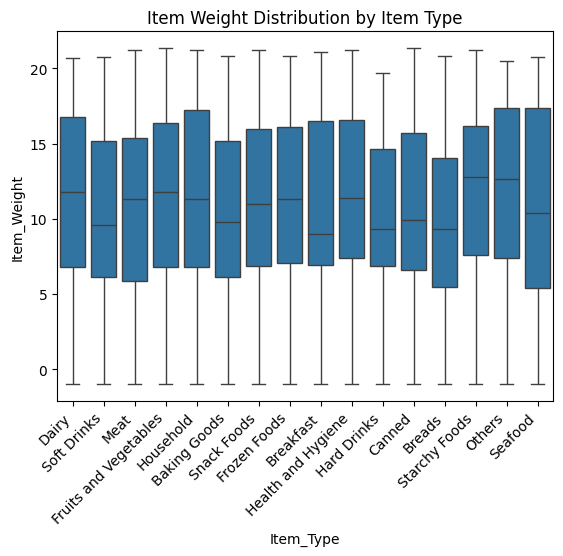

In [50]:
ax = sns.boxplot(data=df, y="Item_Weight", x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Item Weight Distribution by Item Type")



```
We can observer here different weights accross different product types.
When comparing the boxes and medians for different item types, we can see if there are differences in their typical item weights.

If one item type has a boxplot higher than another, it generally means that the typical item weight for that type is higher.

We also can see the variation in weights for each type by looking at the spread of the boxes and the length of the whiskers(min an max value reached).  

The plot  provides a quick and visual way to compare the distributions of weights between various item types.
```



### Item Outlet Sales Distribution by Item Type

<ipython-input-47-cfb977e61008>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0.5, 1.0, 'Item Outlet Sales Distribution by Item Type')

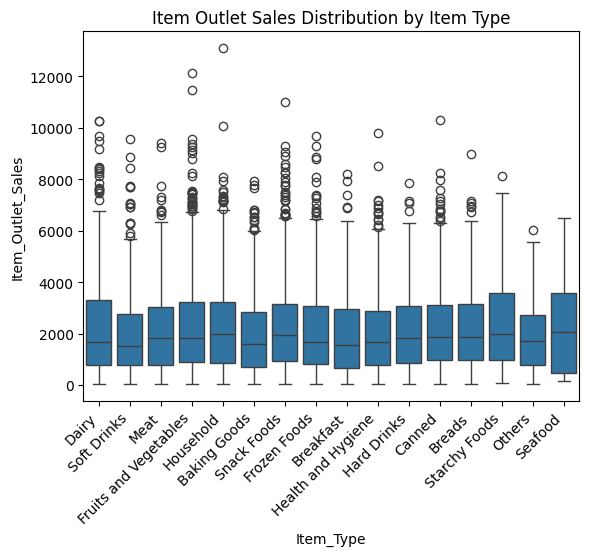

In [47]:
ax = sns.boxplot(data=df, y="Item_Outlet_Sales", x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Item Outlet Sales Distribution by Item Type")

### Item MRP Distribution by Item Type

<ipython-input-48-81605a77c816>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0.5, 1.0, 'Item MRP Distribution by Item Type')

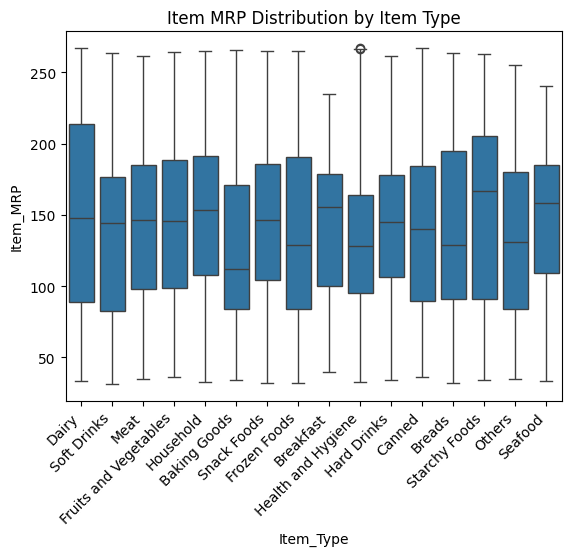

In [48]:
ax = sns.boxplot(data=df, y="Item_MRP", x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Item MRP Distribution by Item Type")



```
The plot provides a quick visual way to compare the distributions of MRP across various item types.
By comparing the boxes and medians for different item types, we can see if there are differences in their typical MRP.
The spread of the boxes and the length of the whiskers indicate the variability in MRP for each item type.
```



## Count Plots

Count Plots for all Categorial Columns

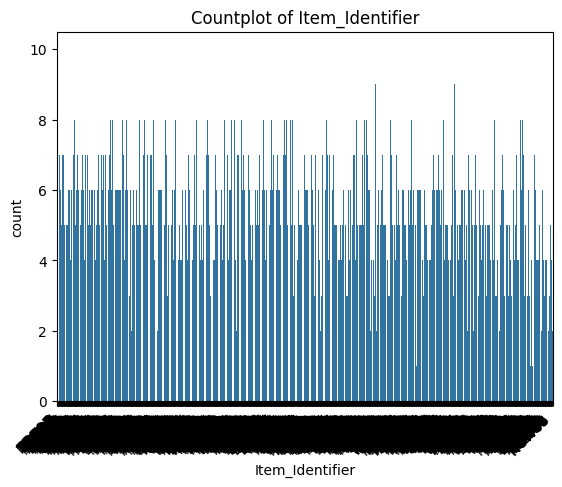

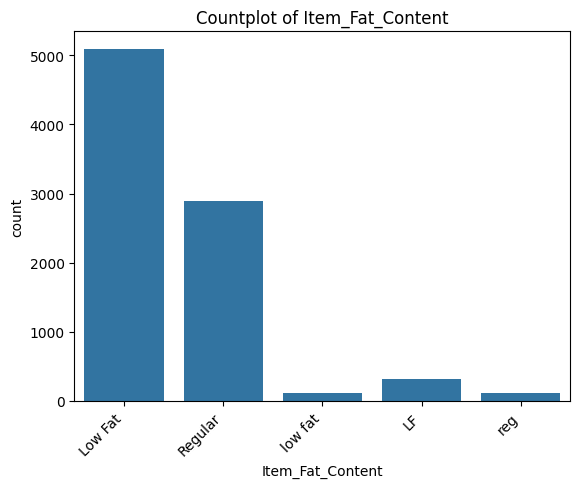

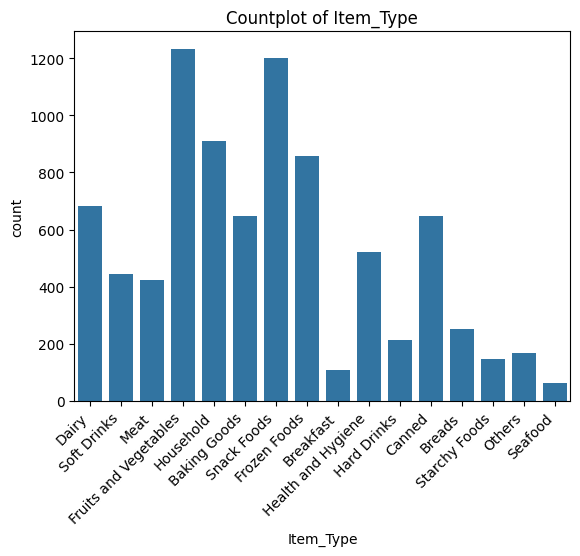

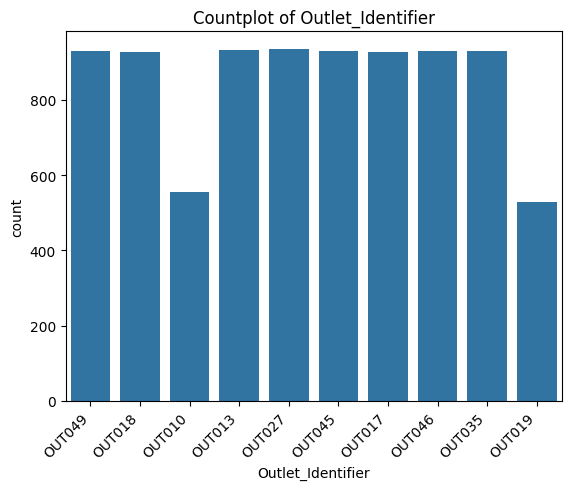

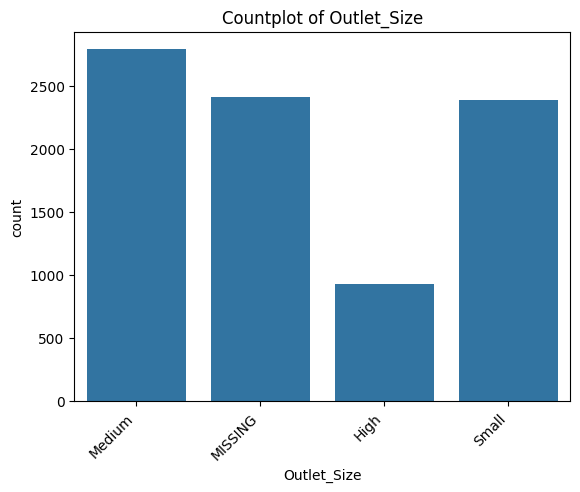

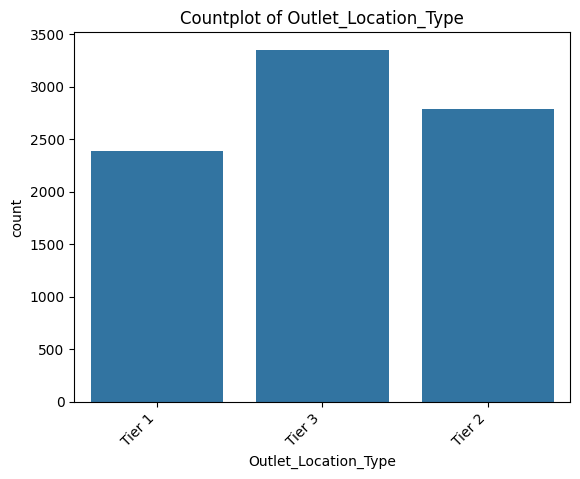

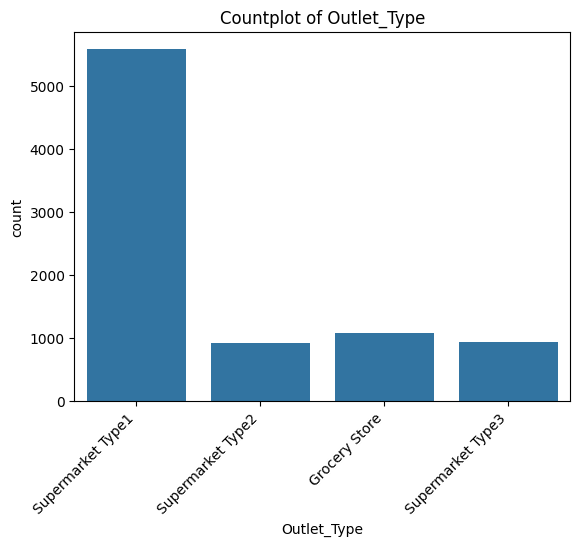

In [52]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
  # plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  sns.countplot(x=col, data=df)
  plt.title(f'Countplot of {col}')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
  plt.show()

## Heat Map

Text(0.5, 1.0, 'Correlation Matrix of Features')

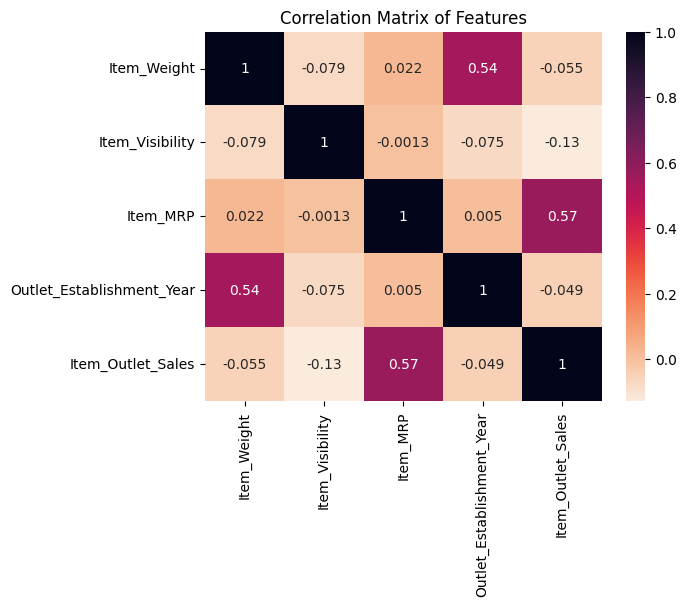

In [66]:
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket_r')
ax.set_title('Correlation Matrix of Features')



```
The heatmap displays the correlation matrix of numerical features in the dataset,
with each square representing the correlation coefficient between two features.

Looking at the heatmap, we can identify which features are strongly correlated with each other, such "Item_MRP" and "Item_Outlet_Sales"
have correlation coffecient of 0.57 it means there is a strong positive relationship meaning as one increases, the other tends to increase.  
Features with values near 0 show little to no linear relationship.
And Negative values suggests a negative relationship - as one increases, the other tends to decrease.


Heat maps helps in identify redundant features (highly correlated features)
that can be removed to simplify models without losing much information.
Including highly correlated features in a model can lead to multicollinearity issues,
which leads to struggles to distinguish the individual effects of these features
```

